In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv('selected_col_v2.csv')
# df = df.drop(columns=['Unnamed: 0'])
# df = df.dropna()
# df.loc[df['Year_2923'] == 1, 'Year_2023'] = 1
# df.loc[df['Year_2923'] == 1, 'Year_2923'] = 0

# df = df.drop(['Year_2923'], axis=1)
# df.shape

(2066, 170)

In [6]:
df = pd.read_csv('all_combined_v2.csv')
df.loc[df.Year==2923,'Year'] = 2023
df.Year.unique()

array([2019, 2021, 2012, 2013, 2014, 2015, 2017, 2018, 2020, 2022, 2016,
       2023, 2011])

In [11]:
country_list = []
for i in df.Country.unique():
    country_list.append(i)

country_list

['Brazil',
 'Colombia',
 'Honduras',
 'Indonesia',
 'Ecuador',
 'El Salvador',
 'Nicaragua',
 'Costa Rica',
 'Perú',
 'México',
 'Ethiopia',
 'Rwanda',
 'Burundi',
 'Guatemala']

# Descriptive Statistics

## High bid

/var/folders/v_/v_m8bpy56qs8990q83lsf1bm0000gn/T/ipykernel_22062/2474630608.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/v_/v_m8bpy56qs8990q83lsf1bm0000gn/T/ipykernel_22062/2474630608.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




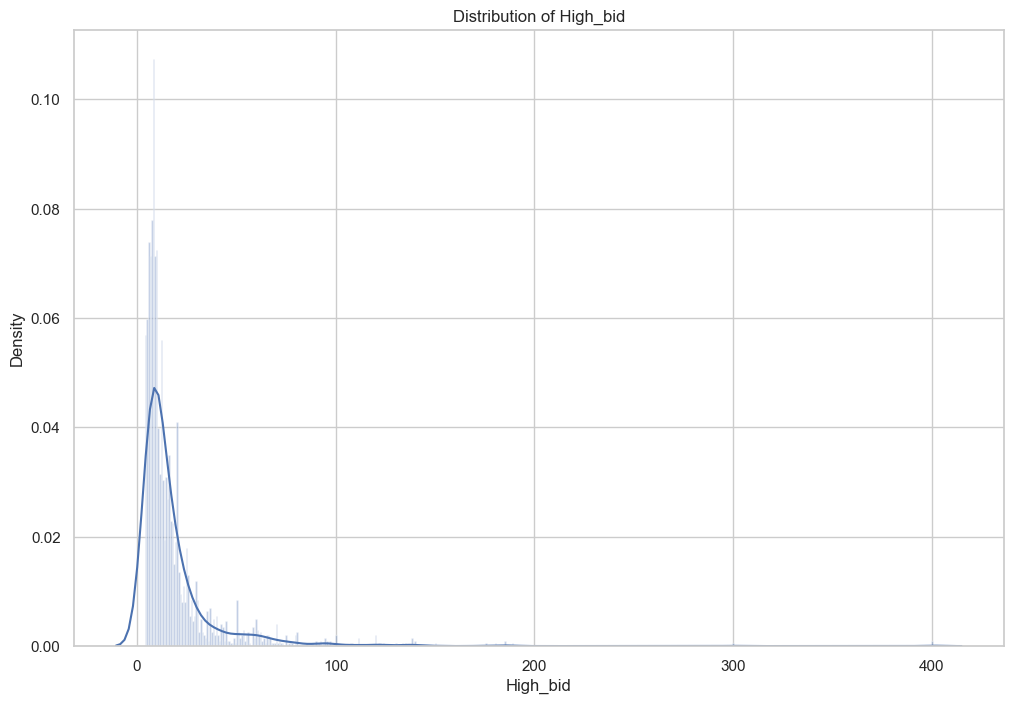

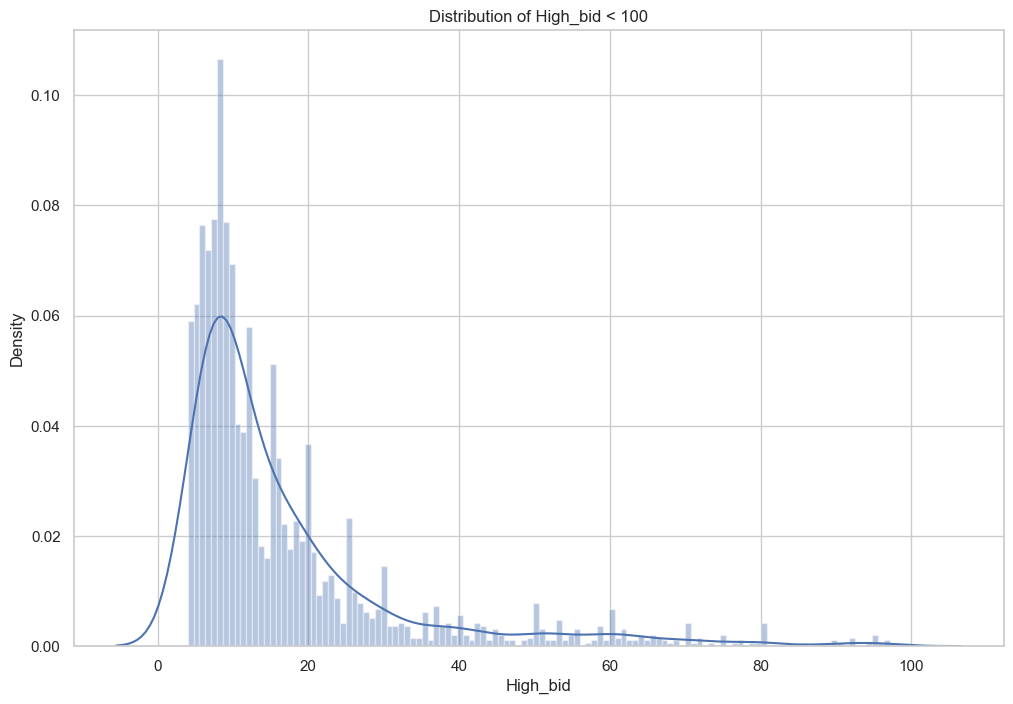

In [41]:
# plot the distribution of 'High_bid', use 500 bins, use seaborn, y: count
plt.figure(figsize=(12, 8))
sns.distplot(df.High_bid, bins=500)
plt.title('Distribution of High_bid')
plt.xlabel('High_bid')
# save the plot to folder 'graph'
plt.savefig('graph/Distribution of High_bid.png')
# fig = px.histogram(df, x='High_bid', nbins=500, title='Distribution of High_bid')
# fig.show()
df_temp = df[df['High_bid']<100].copy()
plt.figure(figsize=(12, 8))
sns.distplot(df_temp.High_bid, bins=120)
plt.title('Distribution of High_bid < 100')
plt.xlabel('High_bid')
# save
plt.savefig('graph/Distribution of High_bid < 100.png')

# fig = px.histogram(df_temp, x='High_bid', nbins=120, title='Distribution of High_bid < 100')
# fig.show()
# fig = px.histogram(df, x='High_bid', nbins=100, title='Distribution of High_bid')
# fig.show()


## Country

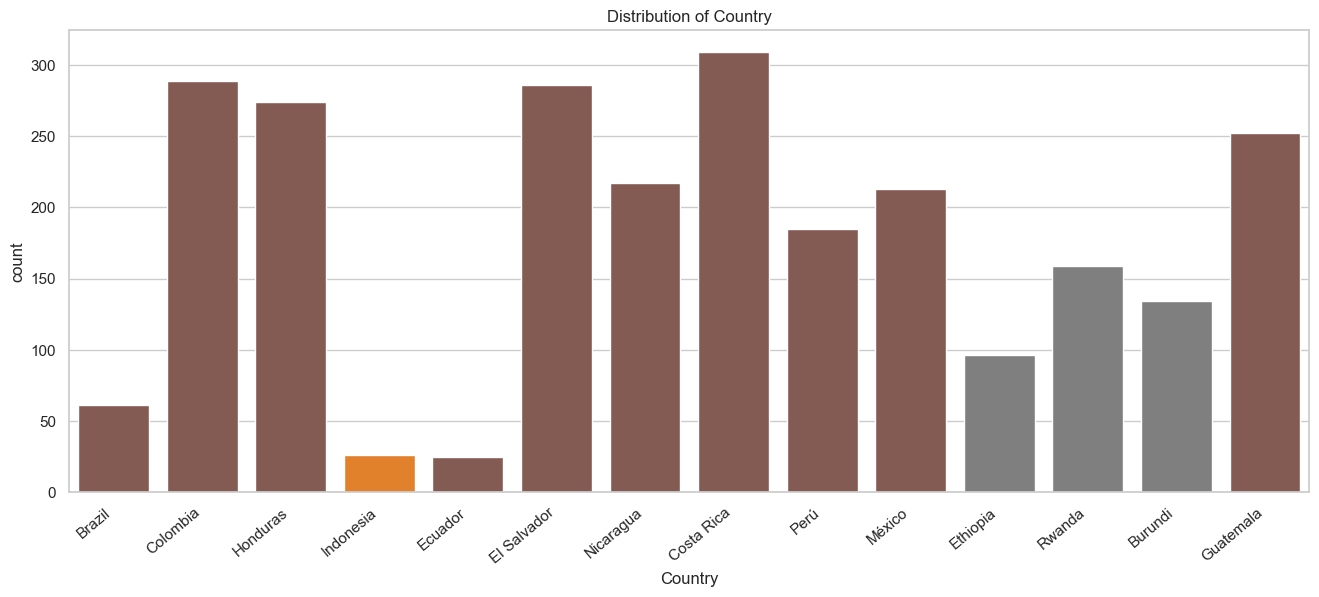

In [60]:
# plot the distribution of country
# color by continent
color_map = {'Brazil': '#8c564b',
             'Colombia': '#8c564b',
             'El Salvador': '#8c564b',
             'Honduras': '#8c564b',
             'Ecuador': '#8c564b', 
             'Nicaragua': '#8c564b', 
             'Costa Rica': '#8c564b',
             'Perú': '#8c564b',  
             'México': '#8c564b', 
             'Guatemala': '#8c564b',
             'Ethiopia': '#7f7f7f', 
             'Rwanda': '#7f7f7f',
             'Burundi': '#7f7f7f',
             'Indonesia': '#ff7f0e'}
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="Country", data=df_temp, palette=color_map)
# sort the x axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Country')
# save
plt.savefig('graph/Distribution of Country.png')


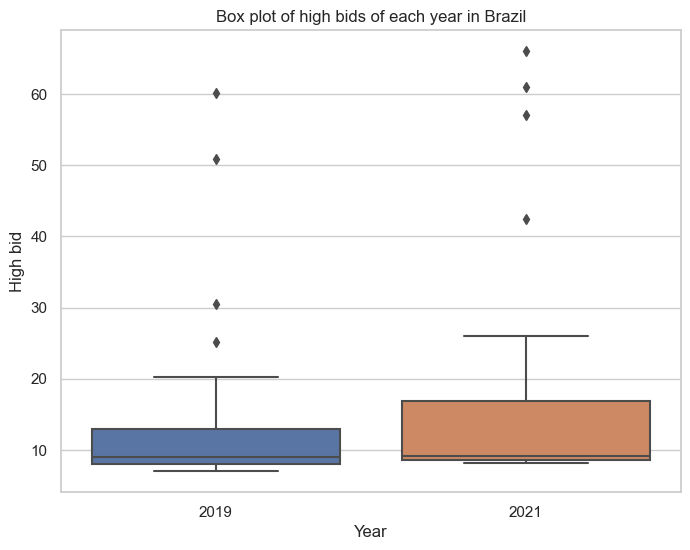

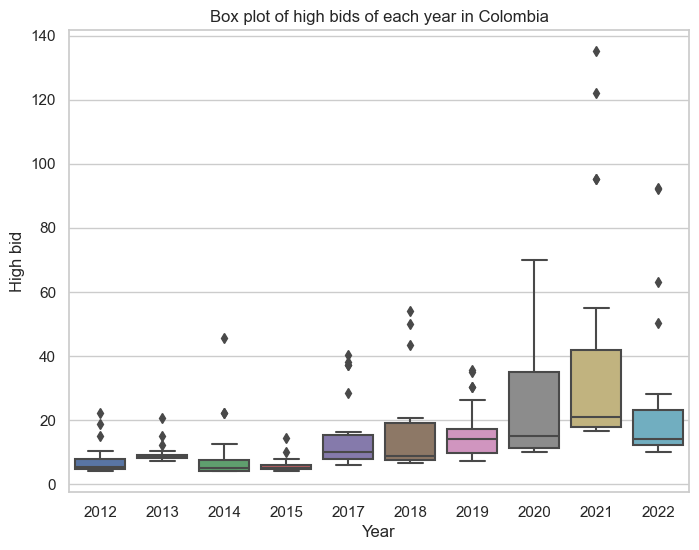

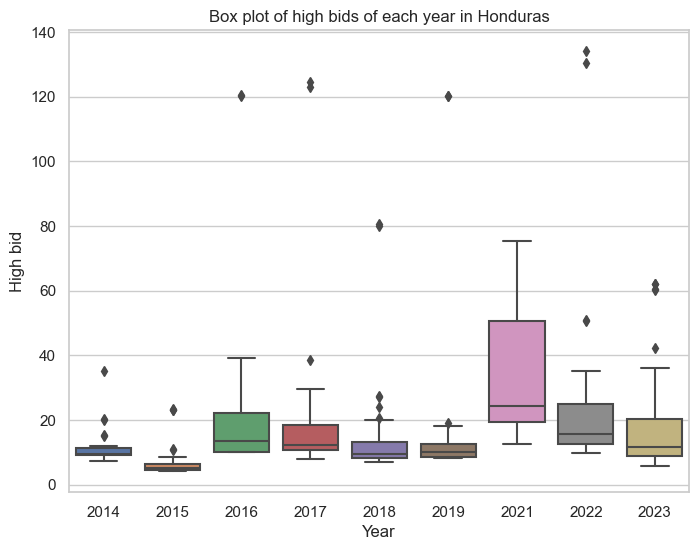

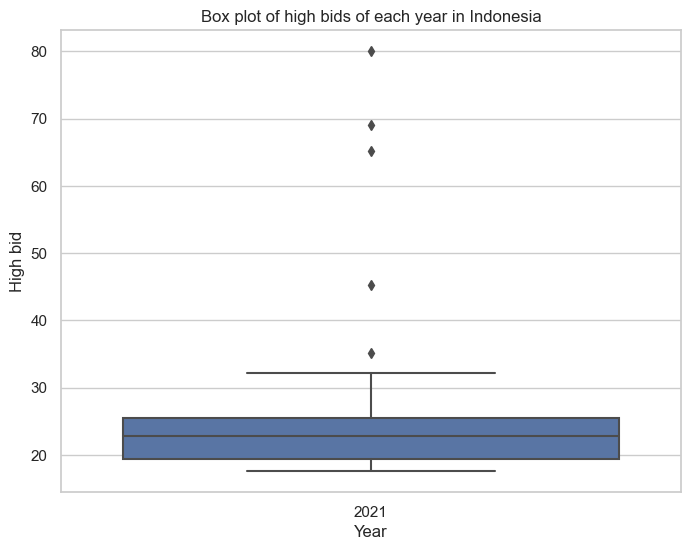

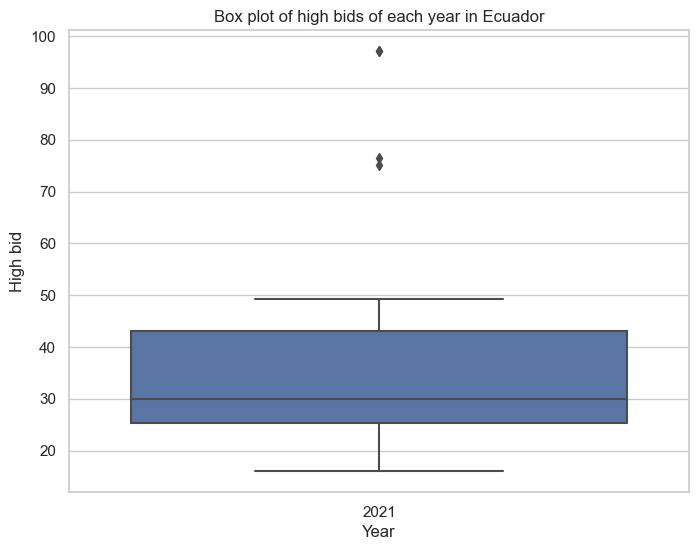

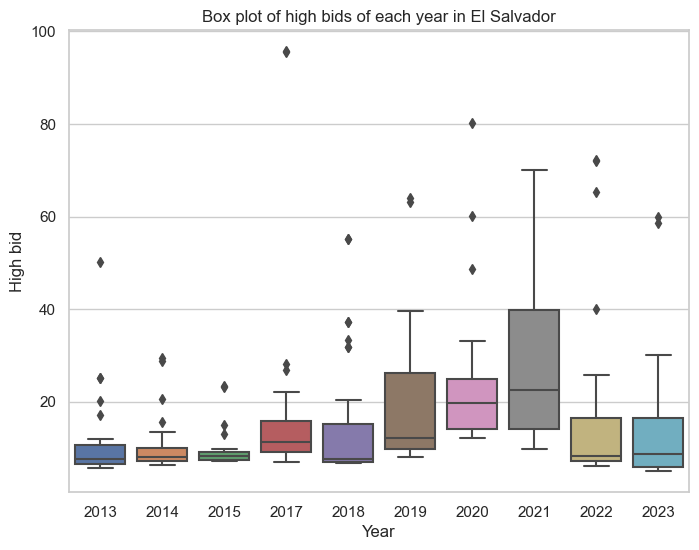

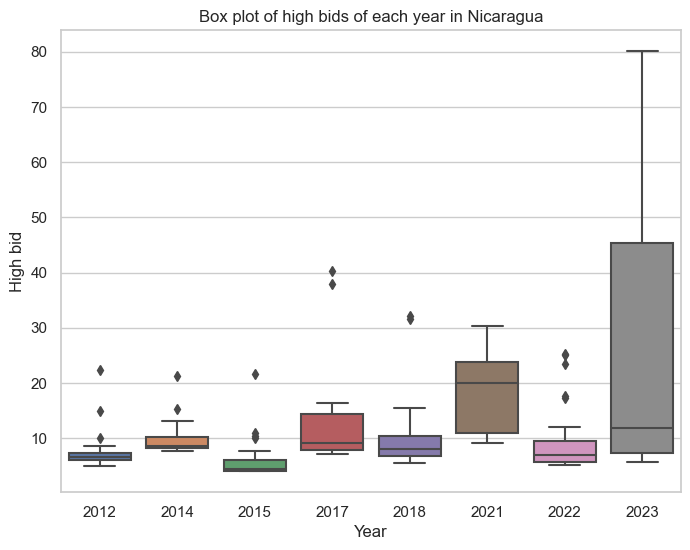

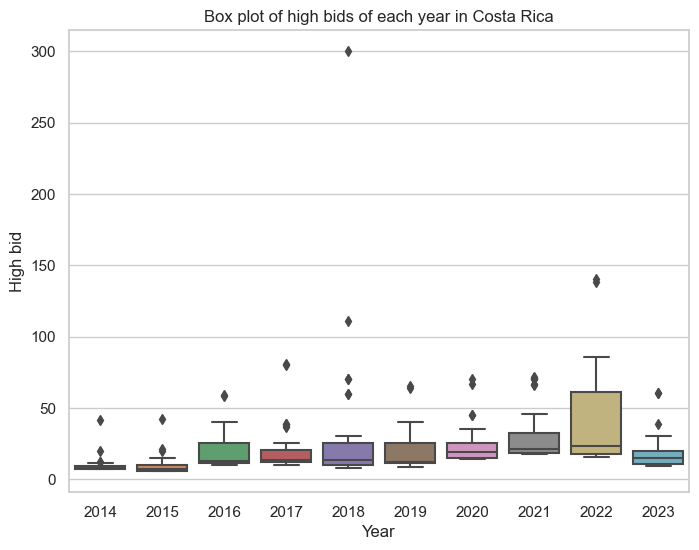

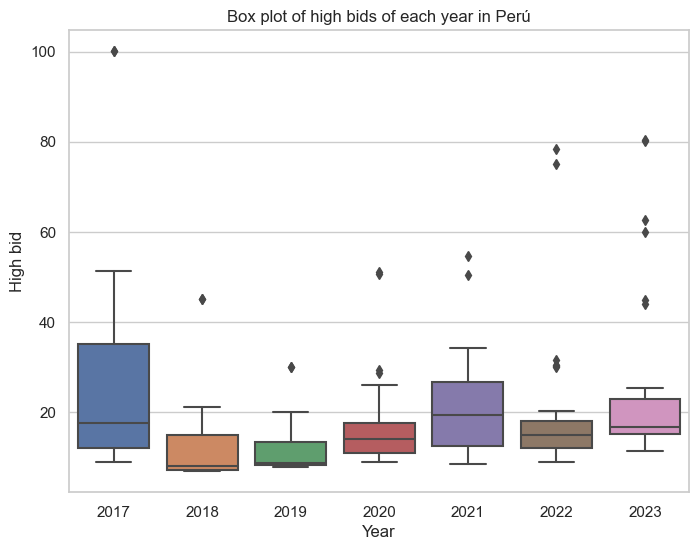

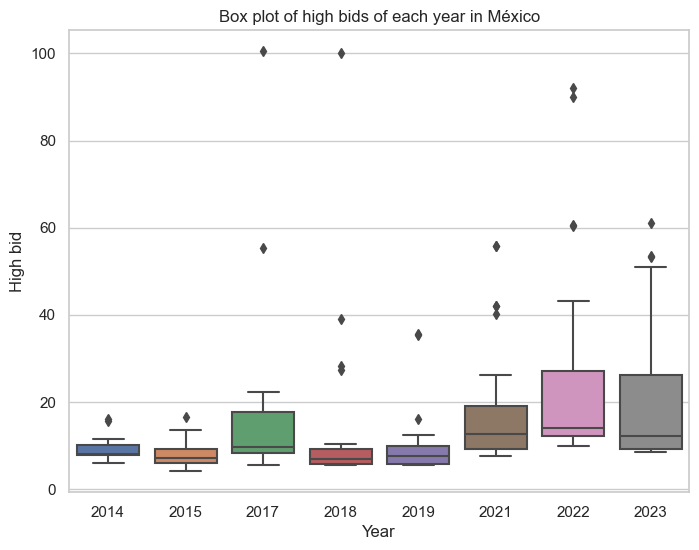

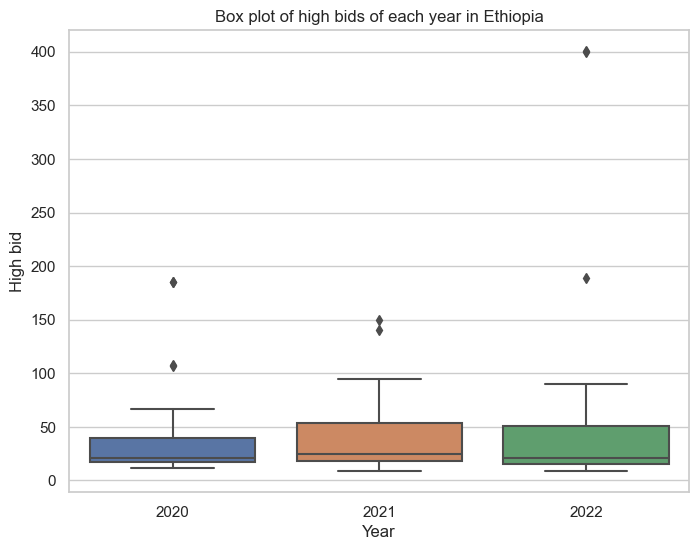

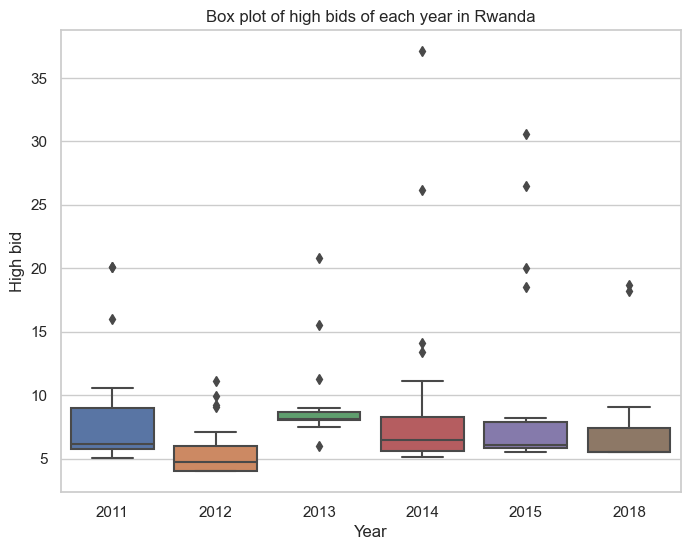

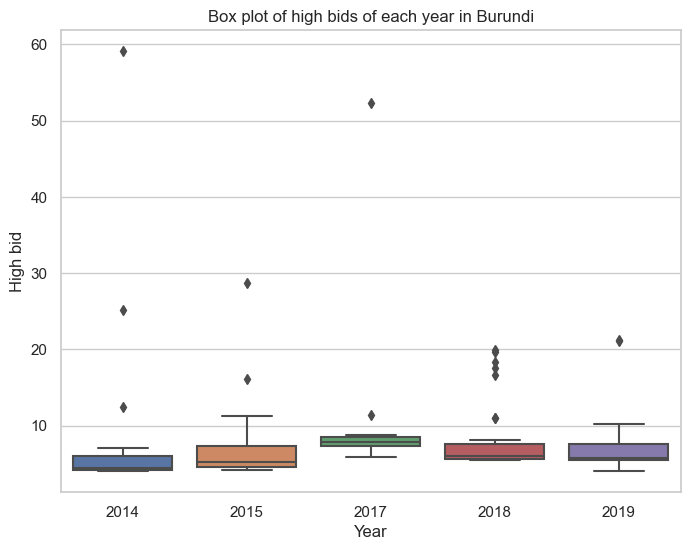

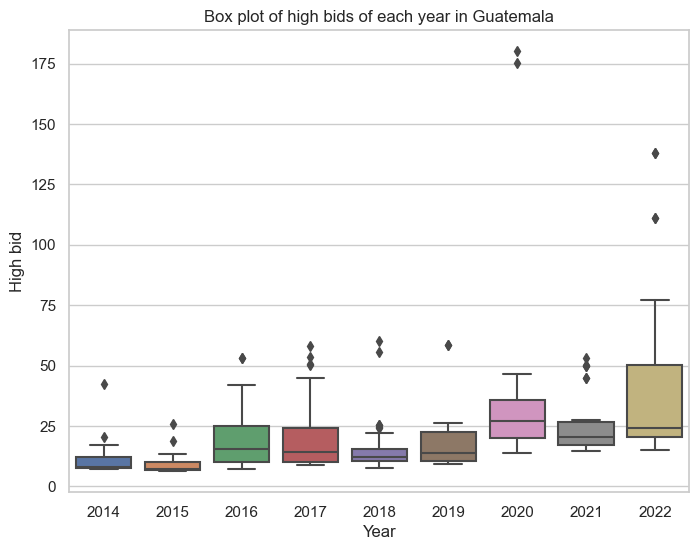

In [15]:
# box plot of price of each year
# fig = px.box(df, x="Year", y="High_bid", points="all")
# fig.update_layout(
#     title="Box plot of price of each year",
#     xaxis_title="Year",
#     yaxis_title="High bid",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="#7f7f7f"
#     )
# )
# fig.show()

# box plot of High_bid of each year of each country, using seaborn
import seaborn as sns

for c in country_list:
    df_c = df[df.Country==c]
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Year", y="High_bid", data=df_c)
    ax.set_title("Box plot of high bids of each year in " + c)
    ax.set_xlabel("Year")
    ax.set_ylabel("High bid")
    # plt.savefig('boxplot_' + c + '.png')
    plt.show()

# sns.set(style="whitegrid")
# ax = sns.boxplot(x="Year", y="High_bid", data=df)
# ax.set_title("Box plot of high bids of each year")
# ax.set_xlabel("Year")
# ax.set_ylabel("High bid")




## Buyers

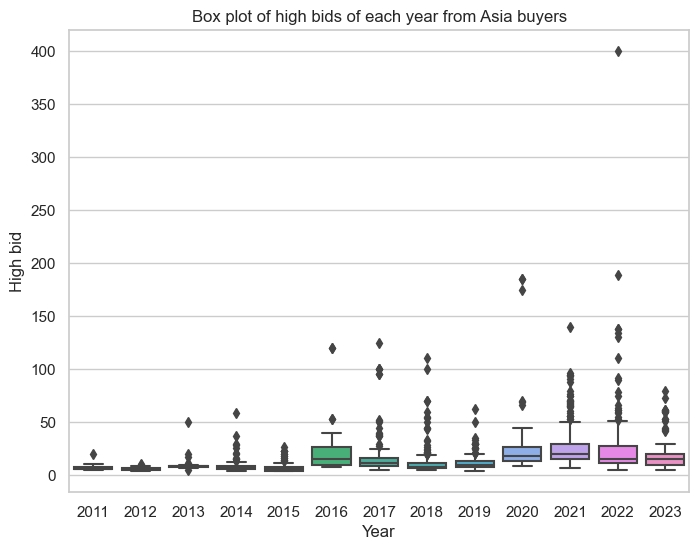

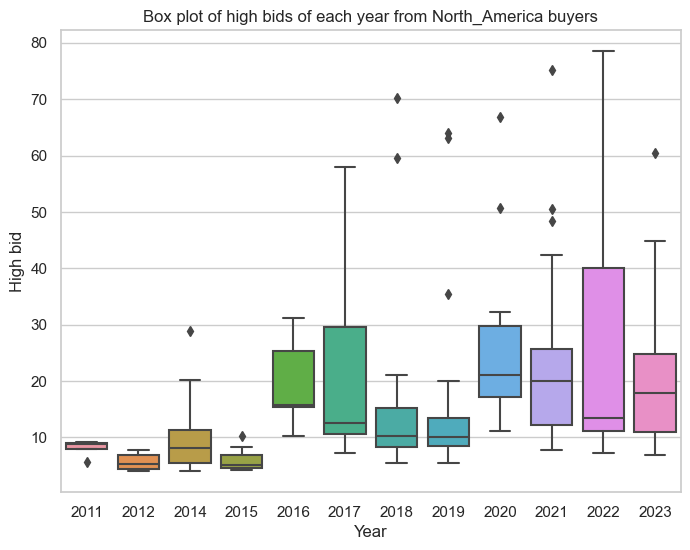

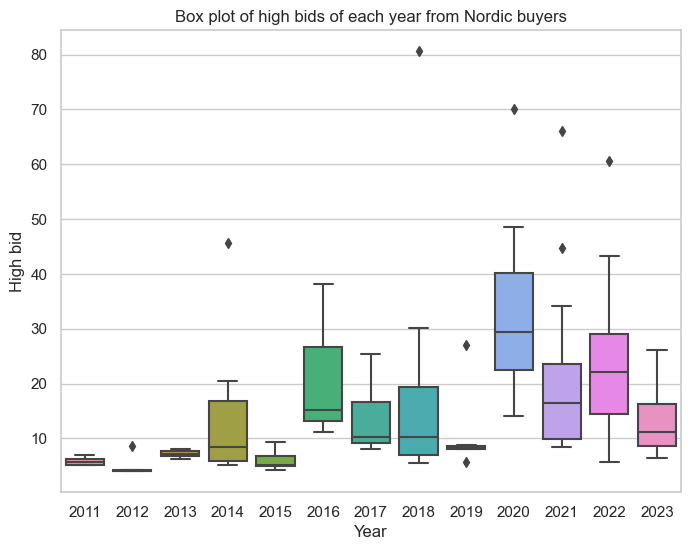

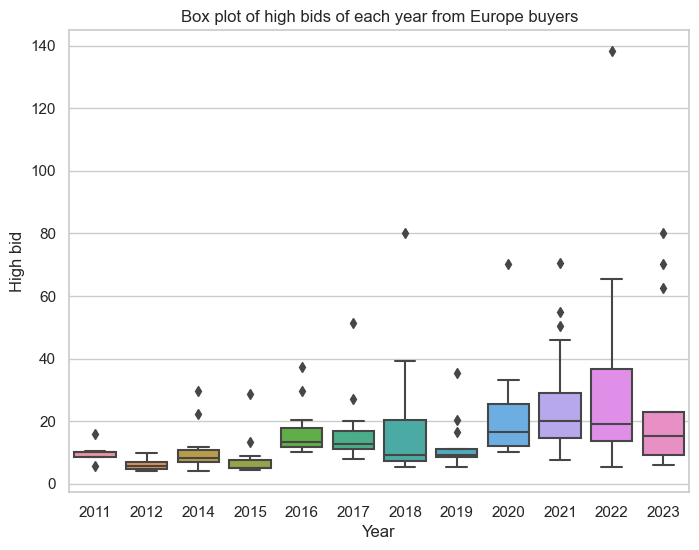

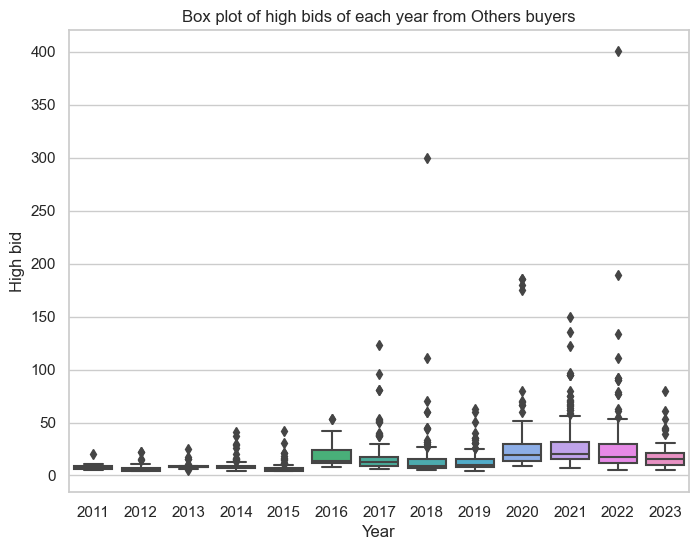

In [16]:
# plot the box plot of high bids of each year of each buyer
buyer_list = ['Asia','North_America','Nordic','Europe','Others']
for b in buyer_list:
    df_b = df[df[b]==1]
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Year", y="High_bid", data=df_b)
    ax.set_title("Box plot of high bids of each year from " + b + " buyers")
    ax.set_xlabel("Year")
    ax.set_ylabel("High bid")
    # plt.savefig('boxplot_' + b + '.png')
    plt.show()


## Variety

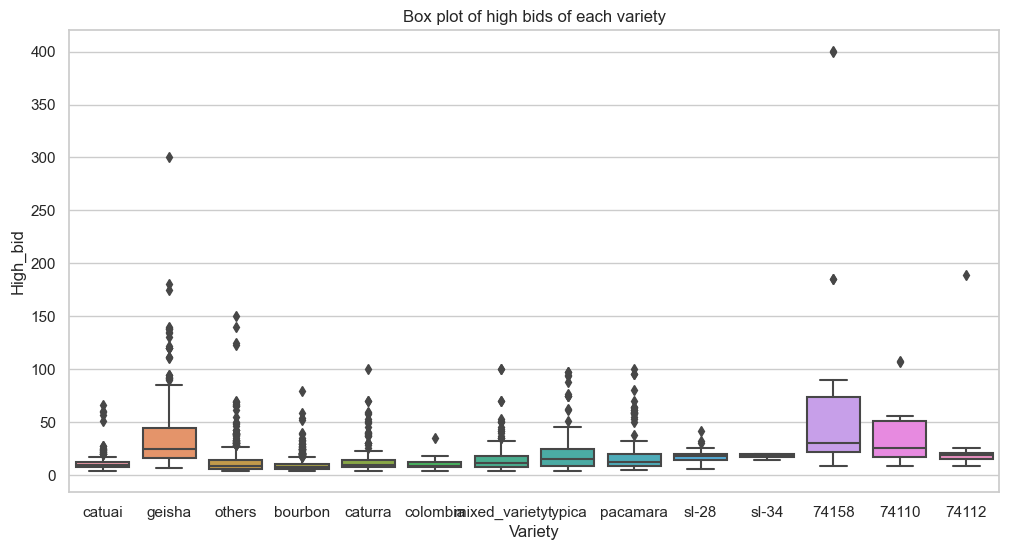

In [44]:
# plot the box plot of high bids of each variety
variety_list = ['geisha','pacamara','catuai','caturra','bourbon','typica','sl-28','sl-34','colombia','74112','74110','74158','mixed_variety']
# for v in variety_list:
#     df_v = df[df[v]==1]
#     plt.figure(figsize=(8, 6))
#     sns.set(style="whitegrid")
#     ax = sns.boxplot(x="Year", y="High_bid", data=df_v)
#     ax.set_title("Box plot of high bids of each year of " + v)
#     ax.set_xlabel("Year")
#     ax.set_ylabel("High bid")
#     # plt.savefig('boxplot_' + v + '.png')
#     plt.show()

df_temp = df.copy()
df_temp['Variety'] = np.nan
for v in variety_list:
    df_temp.loc[df_temp[v]==1,'Variety'] = v
df_temp['Variety'] = df_temp['Variety'].fillna('others')
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x="Variety", y="High_bid", data=df_temp)
ax.set_title("Box plot of high bids of each variety")
# save
plt.savefig('graph/Box plot of high bids of each variety.png')

## Process

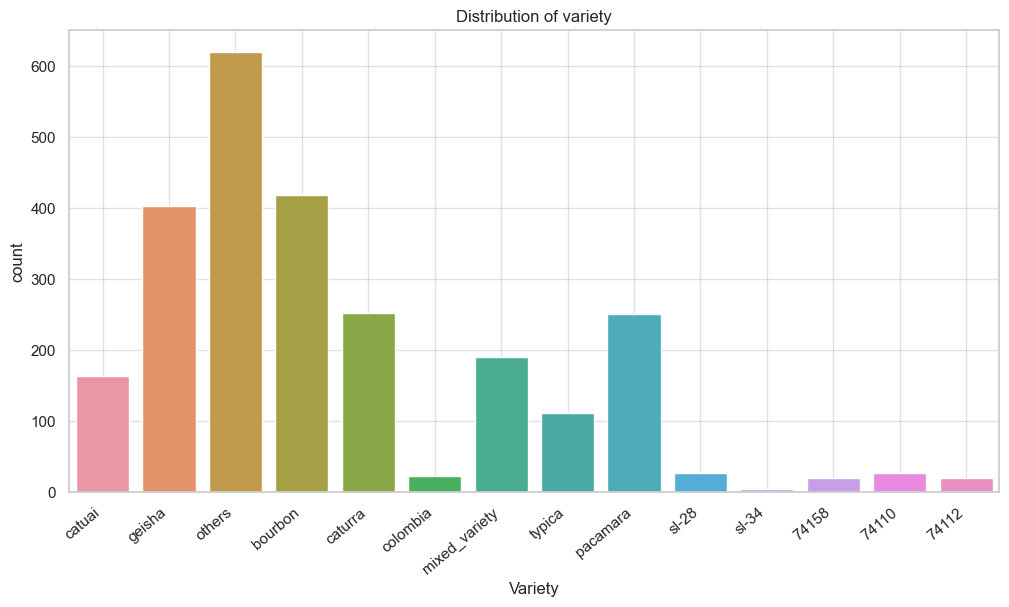

In [53]:
# plot distribution of variety
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="Variety", data=df_temp)
# sort the x axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.grid(True, color='#93a1a1', alpha=0.3)

ax.set_title("Distribution of variety")
# save
plt.savefig('graph/Distribution of variety.png')


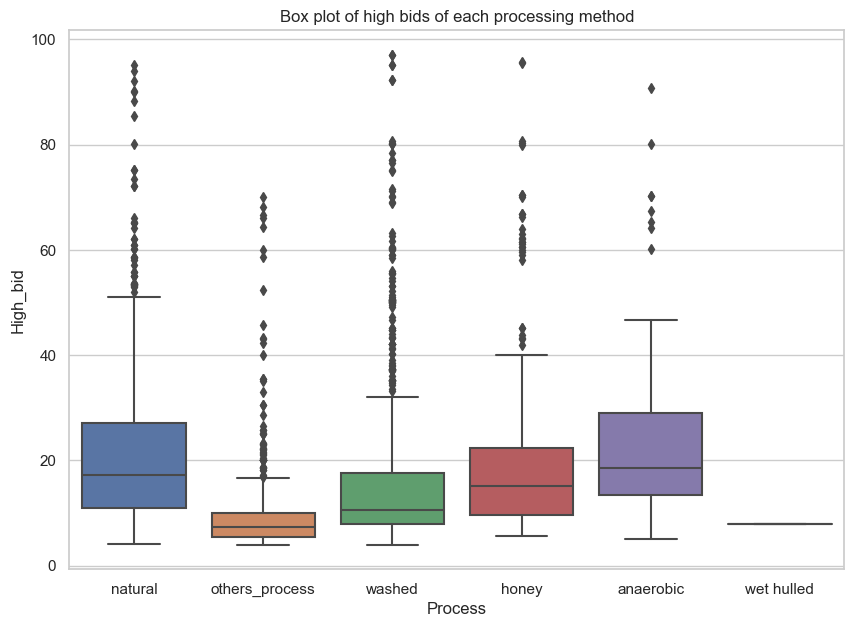

In [43]:
# plot the box plot of high bids of each process
df_temp = df.copy()
df_temp = df_temp[df_temp.High_bid<100]
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
ax = sns.boxplot(x="Process", y="High_bid", data=df_temp)
ax.set_title("Box plot of high bids of each processing method")
# save
plt.savefig('graph/Box plot of high bids of each processing method.png')

## Farm

/var/folders/v_/v_m8bpy56qs8990q83lsf1bm0000gn/T/ipykernel_22062/3540855315.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/Users/chenyian/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning:

Glyph 150 (\x96) missing from current font.

/Users/chenyian/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 150 (\x96) missing from current font.



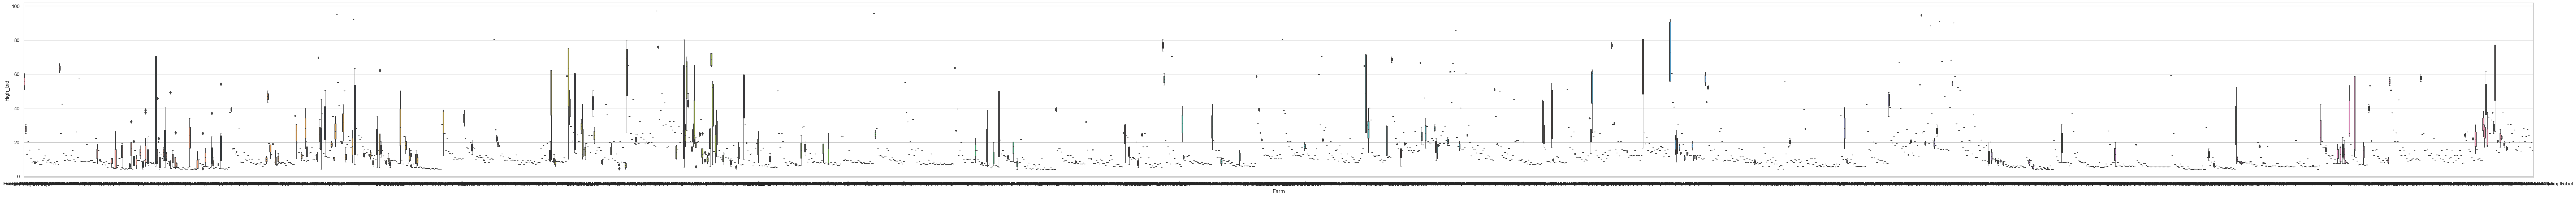

In [29]:
df_temp = df.copy()
df_temp.Farm_name = df_temp.Farm.str.lower()

# plot the box plot of high bids of each farm
# df_temp = df.copy()
df_temp = df_temp[df_temp.High_bid<100]
plt.figure(figsize=(100, 7))
sns.set(style="whitegrid")
ax = sns.boxplot(x="Farm", y="High_bid", data=df_temp)
